### Bayesian Models

### Simulated Model

$$
\begin{split}\begin{aligned}
Y  &\sim \mathcal{N}(\mu, \sigma^2) \\
\mu &= \alpha + \beta_1 X_1 + \beta_2 X_2
\end{aligned}\end{split}
$$

$$

\begin{split}\begin{aligned}
\alpha &\sim \mathcal{N}(0, 100) \\
\beta_i &\sim \mathcal{N}(0, 100) \\
\sigma &\sim \lvert\mathcal{N}(0, 1){\rvert}
\end{aligned}\end{split}


$$


In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 200

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

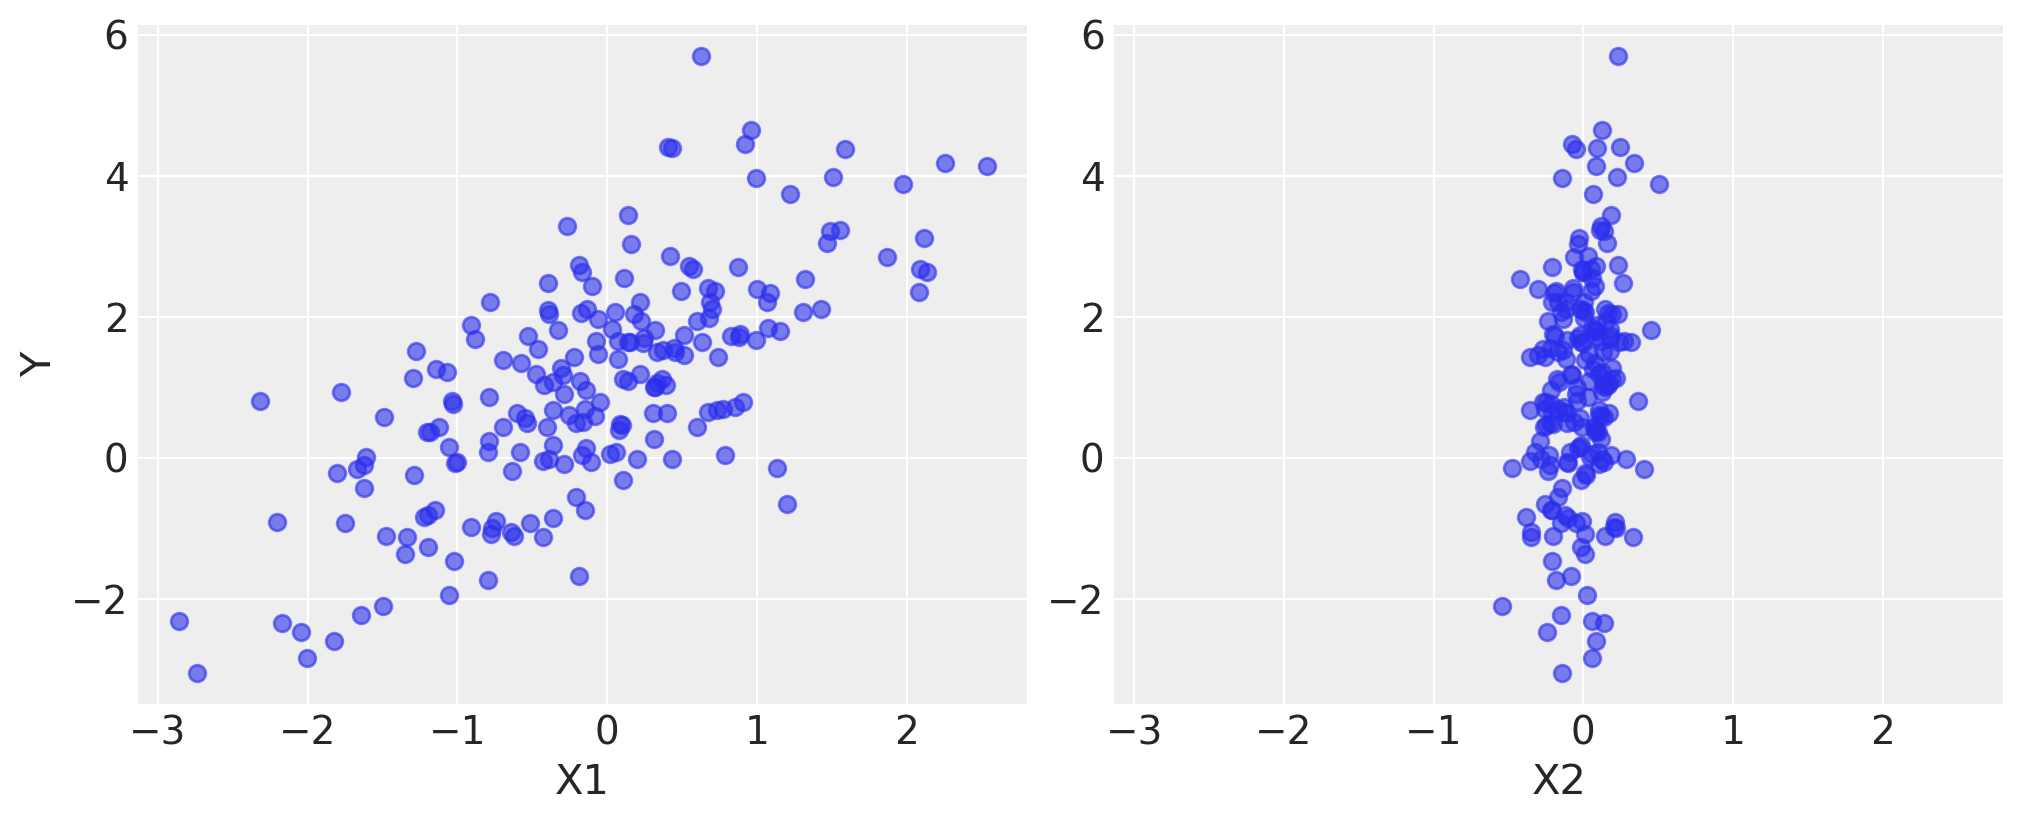

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [5]:
data = pd.DataFrame(dict(x1=X1, x2=X2, y=Y))
data.head(10)

,x1,x2,y
0,-2.207371,0.208721,-0.908210
1,-1.027817,-0.212740,0.765991
2,1.152726,0.084174,1.792192
3,1.065203,-0.210127,2.208134
4,1.000941,-0.302229,2.390749
5,0.333061,-0.168994,1.497919
6,0.991976,-0.107029,1.672961
7,-0.621609,0.142869,-1.109484
8,0.149907,0.320385,1.643649
9,0.101026,-0.248015,0.469229


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [7]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.12.0


c:\Users\danrl\miniconda3\envs\bayesian_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


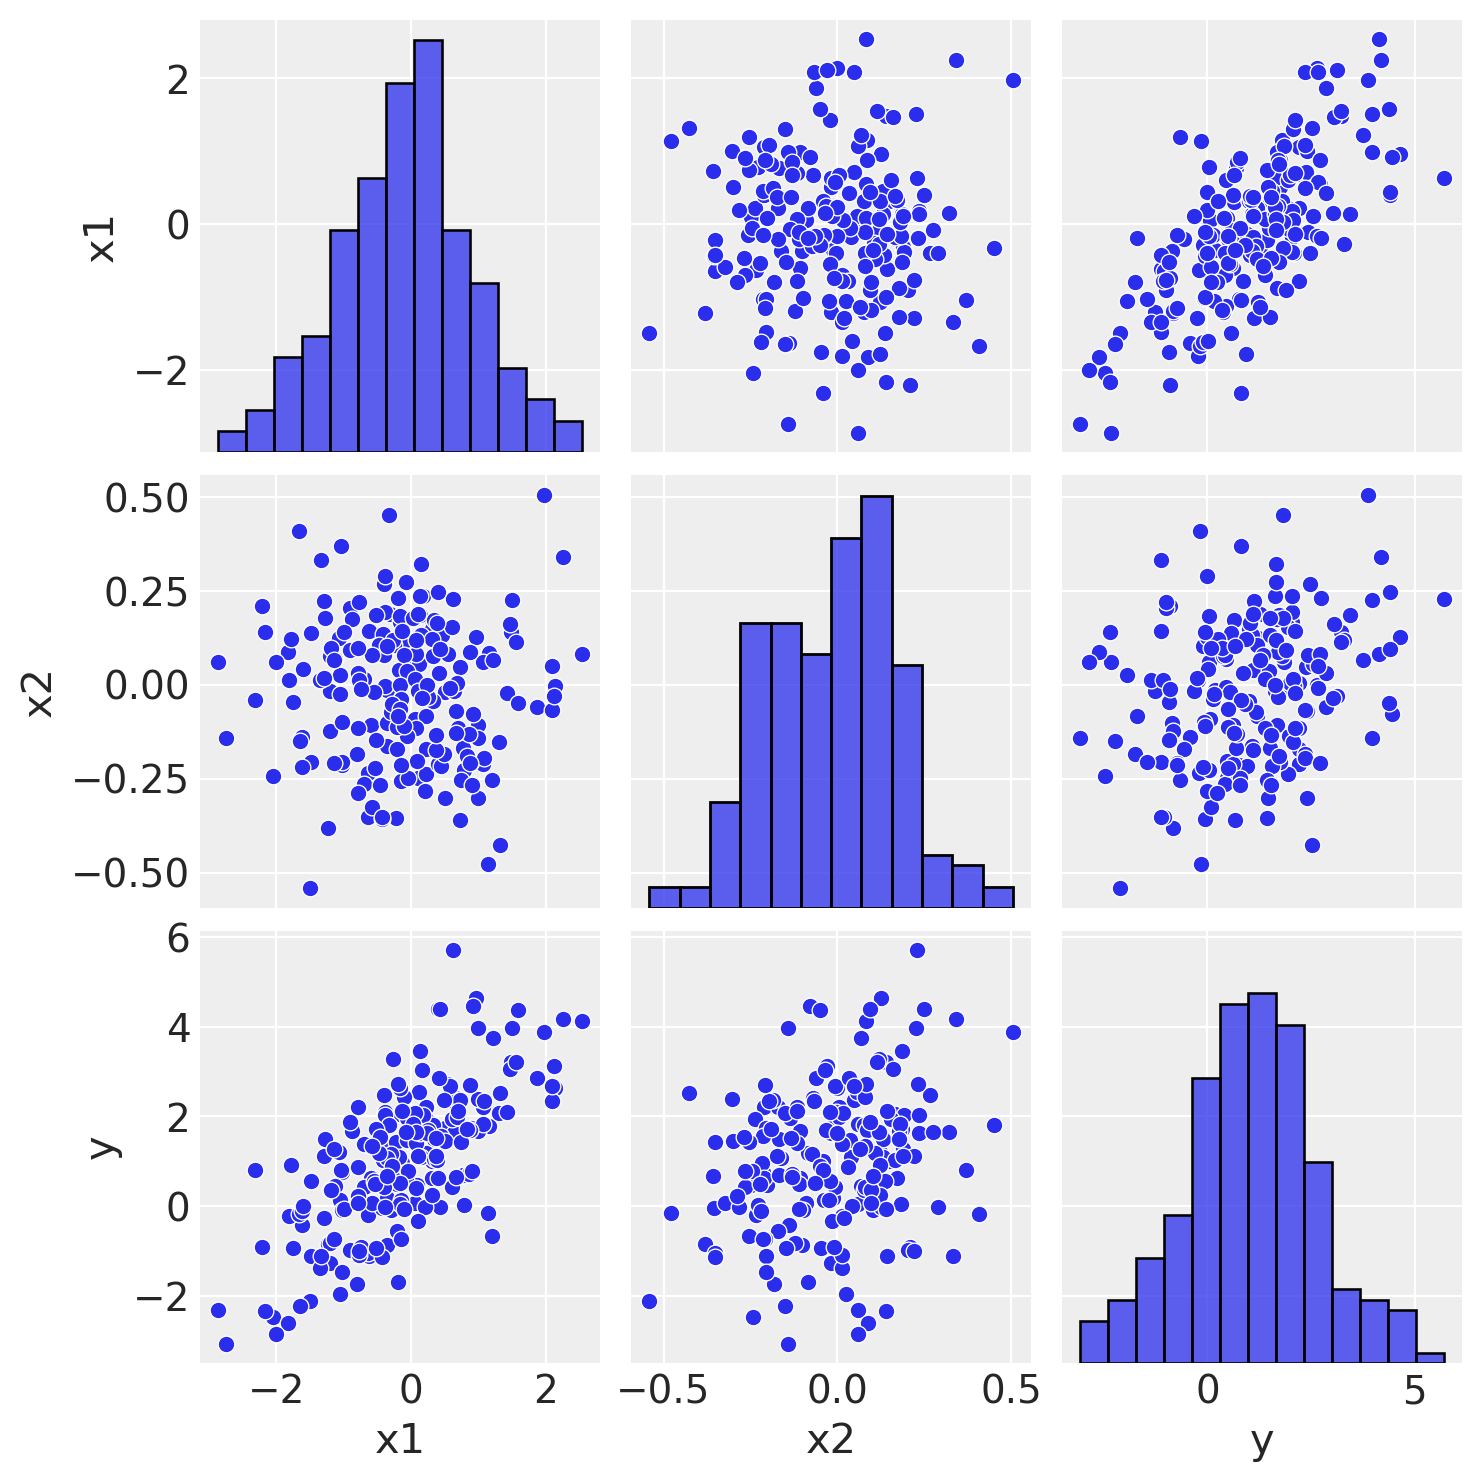

In [8]:
import seaborn as sns

sns.pairplot(data=data, kind="scatter")

In [9]:
import pymc as pm

with pm.Model() as basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [ ]:
from graphviz import backend

print(backend.find_executable('dot'))

In [ ]:
pm.model_to_graphviz(basic_model)

In [15]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 393 seconds.


### Posterior Analysis

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n0'}>],
       [<Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

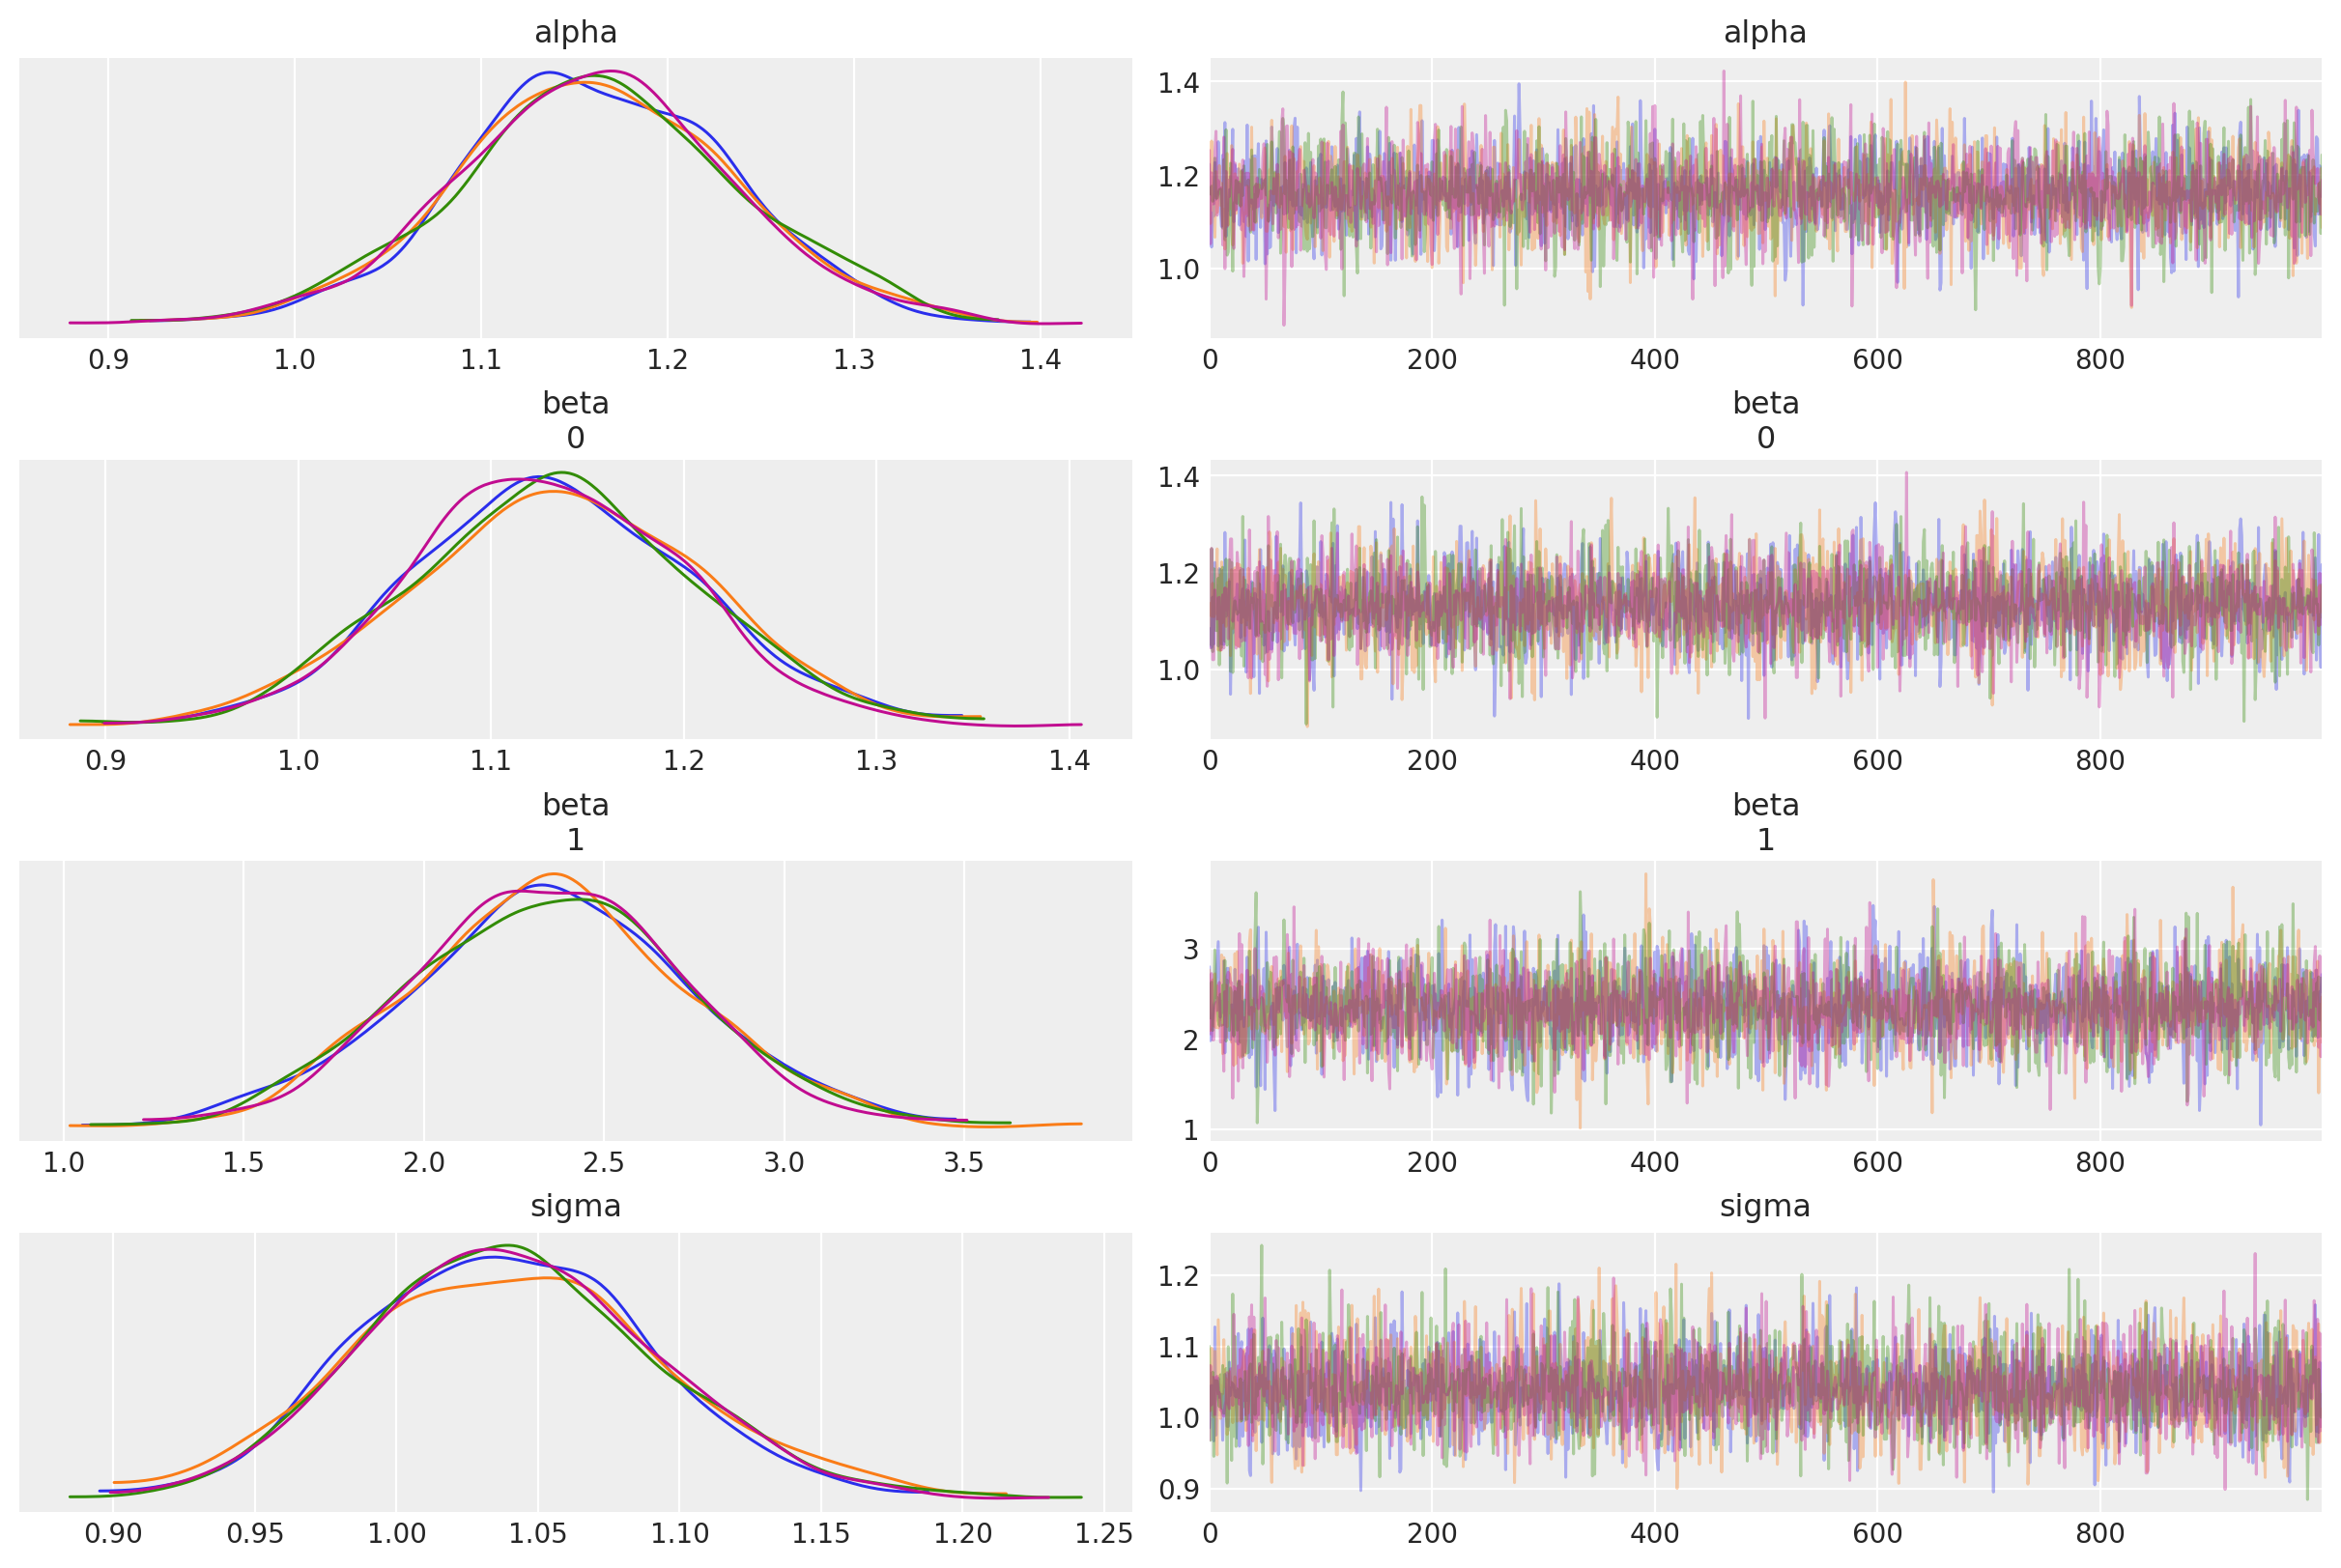

In [16]:
az.plot_trace(idata,  compact=False)

In [17]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.16,0.07,1.03,1.31,0.0,0.0,7207.89,3106.69,1.0
beta[0],1.13,0.07,0.99,1.27,0.0,0.0,6583.95,3204.94,1.0
beta[1],2.35,0.39,1.59,3.06,0.0,0.0,6359.10,3006.33,1.0
sigma,1.04,0.05,0.95,1.14,0.0,0.0,6846.54,3340.53,1.0


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta\n0'}>,
       <Axes: title={'center': 'beta\n1'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

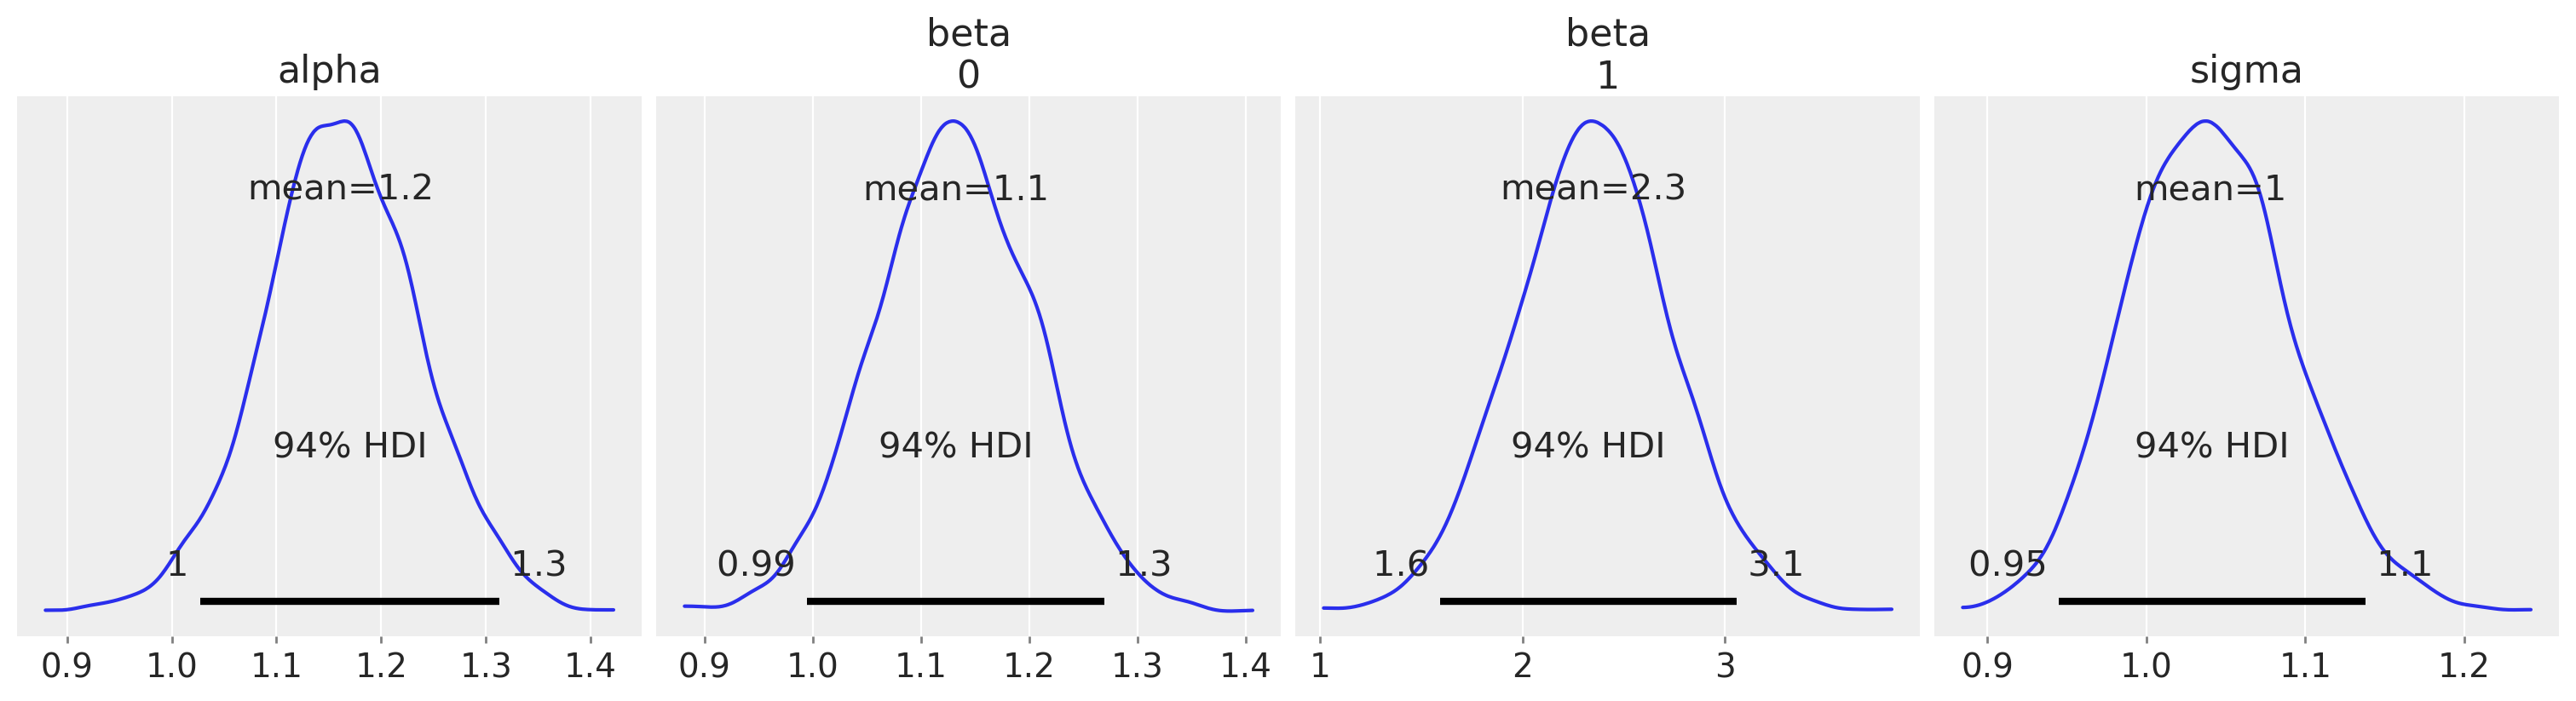

In [18]:
# Agora, passe os valores extraídos para o 'plot_posterior'
az.plot_posterior(
    idata, var_names=["alpha", "beta", "sigma"], 
    figsize=(15, 4)
)

### Estudo de caso 1: Resultados educacionais para crianças com deficiência auditiva 

In [12]:
import pymc as pm

test_scores = pd.read_csv(pm.get_data("test_scores.csv"), index_col=0)
test_scores.head(10)

,score,male,siblings,family_inv,non_english,prev_disab,age_test,non_severe_hl,mother_hs,early_ident,non_white
0,40,0,2.0,2.0,False,NaN,55,1.0,NaN,False,False
1,31,1,0.0,NaN,False,0.0,53,0.0,0.0,False,False
2,83,1,1.0,1.0,True,0.0,52,1.0,NaN,False,True
3,75,0,3.0,NaN,False,0.0,55,0.0,1.0,False,False
5,62,0,0.0,4.0,False,1.0,50,0.0,NaN,False,False
6,85,1,1.0,1.0,False,0.0,53,0.0,NaN,False,False
7,39,0,2.0,3.0,True,1.0,50,1.0,1.0,False,True
9,98,0,0.0,1.0,False,NaN,48,0.0,0.0,True,False
10,64,0,0.0,0.0,True,0.0,54,0.0,NaN,False,True
12,109,1,1.0,0.0,False,0.0,48,1.0,1.0,True,False


In [13]:
test_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 224
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          207 non-null    int64  
 1   male           207 non-null    int64  
 2   siblings       207 non-null    float64
 3   family_inv     174 non-null    float64
 4   non_english    207 non-null    bool   
 5   prev_disab     189 non-null    float64
 6   age_test       207 non-null    int64  
 7   non_severe_hl  207 non-null    float64
 8   mother_hs      134 non-null    float64
 9   early_ident    207 non-null    bool   
 10  non_white      207 non-null    bool   
dtypes: bool(3), float64(5), int64(3)
memory usage: 15.2 KB


<Axes: >

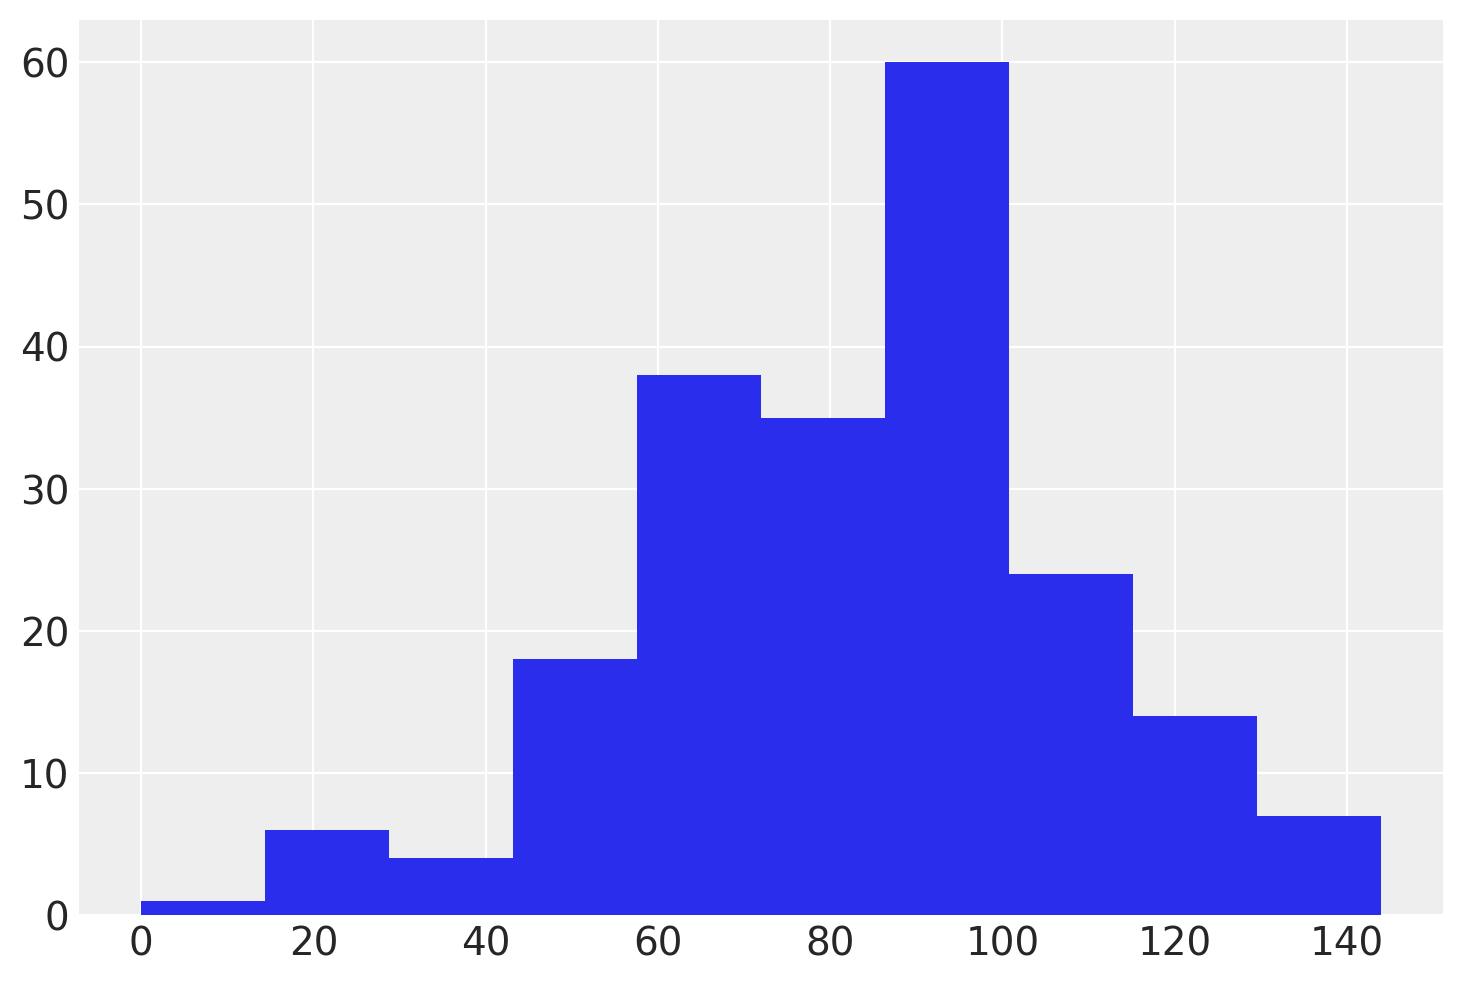

In [14]:
test_scores["score"].hist()

In [15]:
# Dropping missing values is a very bad idea in general, but we do so here for simplicity
X = test_scores.dropna().astype(float)
y = X.pop("score")

# Standardize the features
X -= X.mean()
X /= X.std()

N, D = X.shape

In [16]:
D0 = int(D / 2)

In [17]:
import pytensor.tensor as pt

with pm.Model(coords={"predictors": X.columns.values}) as test_score_model:
    # Prior on error SD
    sigma = pm.HalfNormal("sigma", 25)

    # Global shrinkage prior
    tau = pm.HalfStudentT("tau", 2, D0 / (D - D0) * sigma / np.sqrt(N))
    # Local shrinkage prior
    lam = pm.HalfStudentT("lam", 5, dims="predictors")
    c2 = pm.InverseGamma("c2", 1, 1)
    z = pm.Normal("z", 0.0, 1.0, dims="predictors")
    # Shrunken coefficients
    beta = pm.Deterministic(
        "beta", z * tau * lam * pt.sqrt(c2 / (c2 + tau**2 * lam**2)), dims="predictors"
    )
    # No shrinkage on intercept
    beta0 = pm.Normal("beta0", 100, 25.0)

    scores = pm.Normal("scores", beta0 + pt.dot(X.values, beta), sigma, observed=y.values)

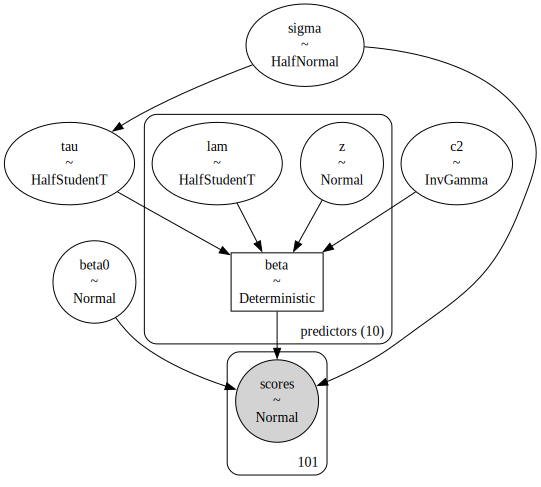

In [18]:
pm.model_to_graphviz(test_score_model)

In [19]:
with test_score_model:
    prior_samples = pm.sample_prior_predictive(100)

Sampling: [beta0, c2, lam, scores, sigma, tau, z]


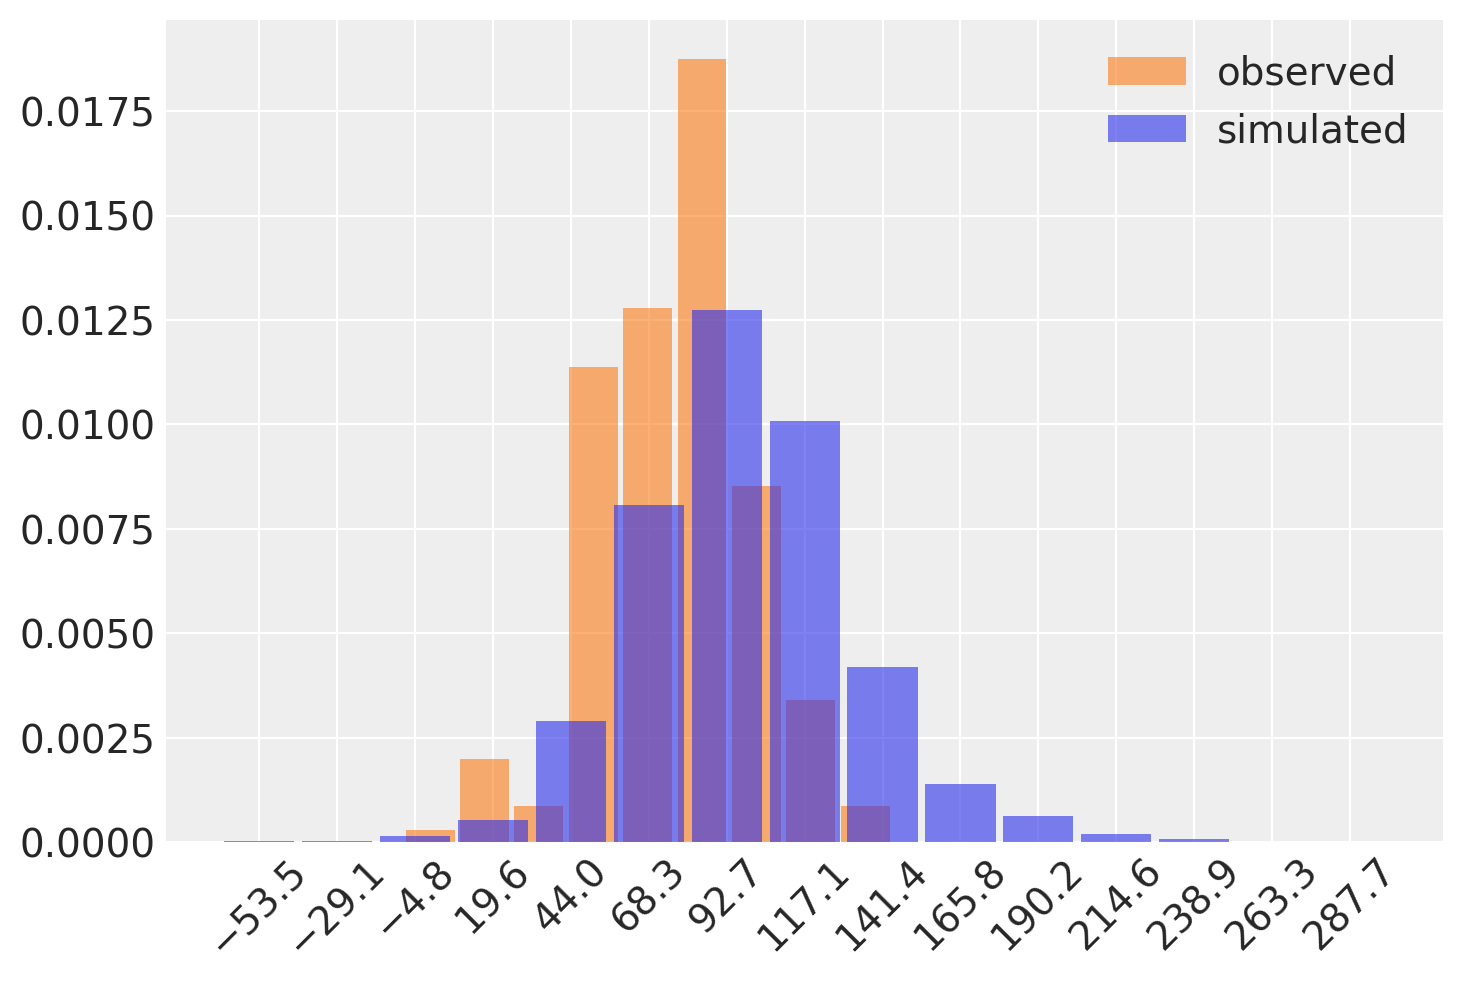

In [20]:
az.plot_dist(
    test_scores["score"].values,
    kind="hist",
    color="C1",
    hist_kwargs={"alpha": 0.6},
    label="observed",
)
az.plot_dist(
    prior_samples.prior_predictive["scores"],
    kind="hist",
    hist_kwargs={"alpha": 0.6},
    label="simulated",
)
plt.xticks(rotation=45);

In [21]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 40 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [22]:
with test_score_model:
    idata = pm.sample(1000, tune=2000, random_seed=42, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, tau, lam, c2, z, beta0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 91 seconds.


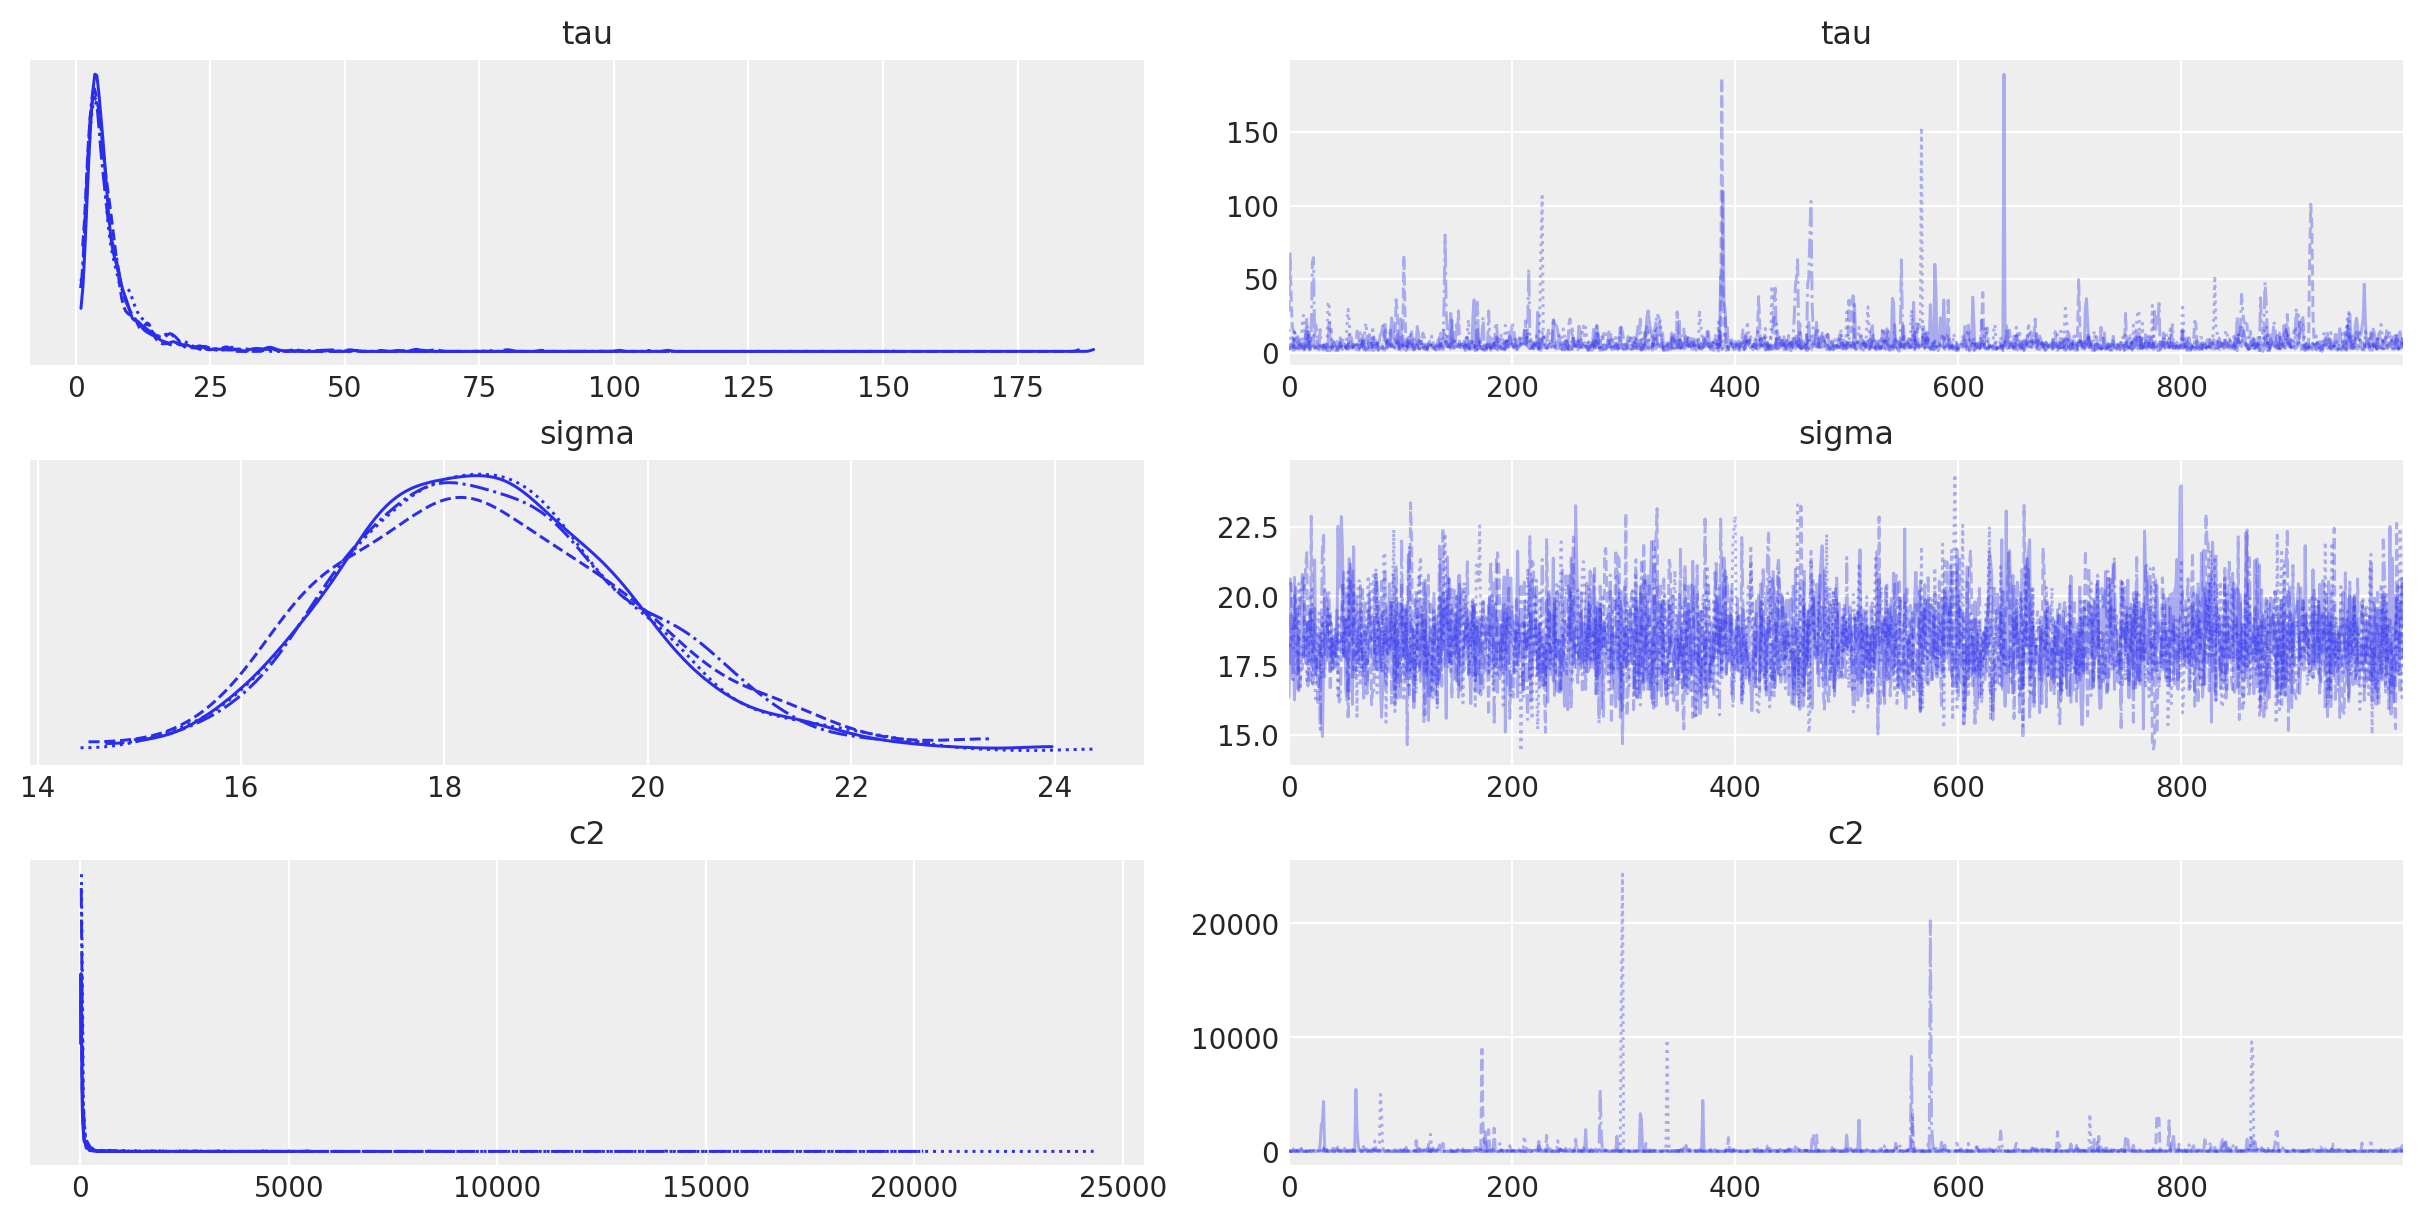

In [23]:
az.plot_trace(idata, var_names=["tau", "sigma", "c2"]);

<Axes: >

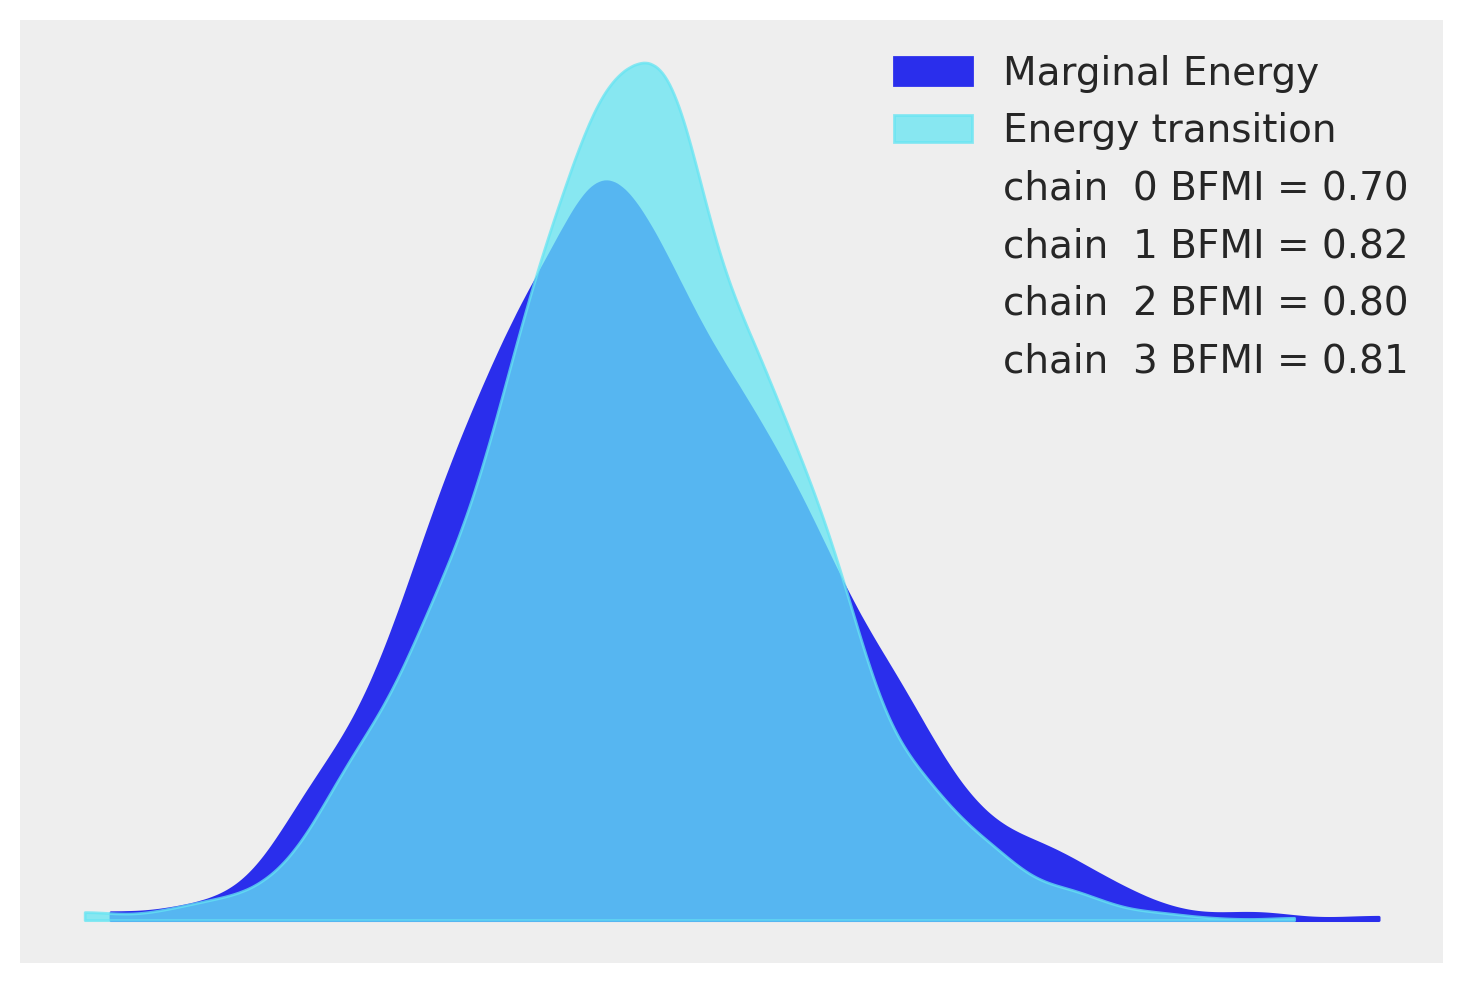

In [24]:
az.plot_energy(idata)

array([<Axes: title={'center': '95.0% HDI'}>,
       <Axes: title={'center': 'r_hat'}>], dtype=object)

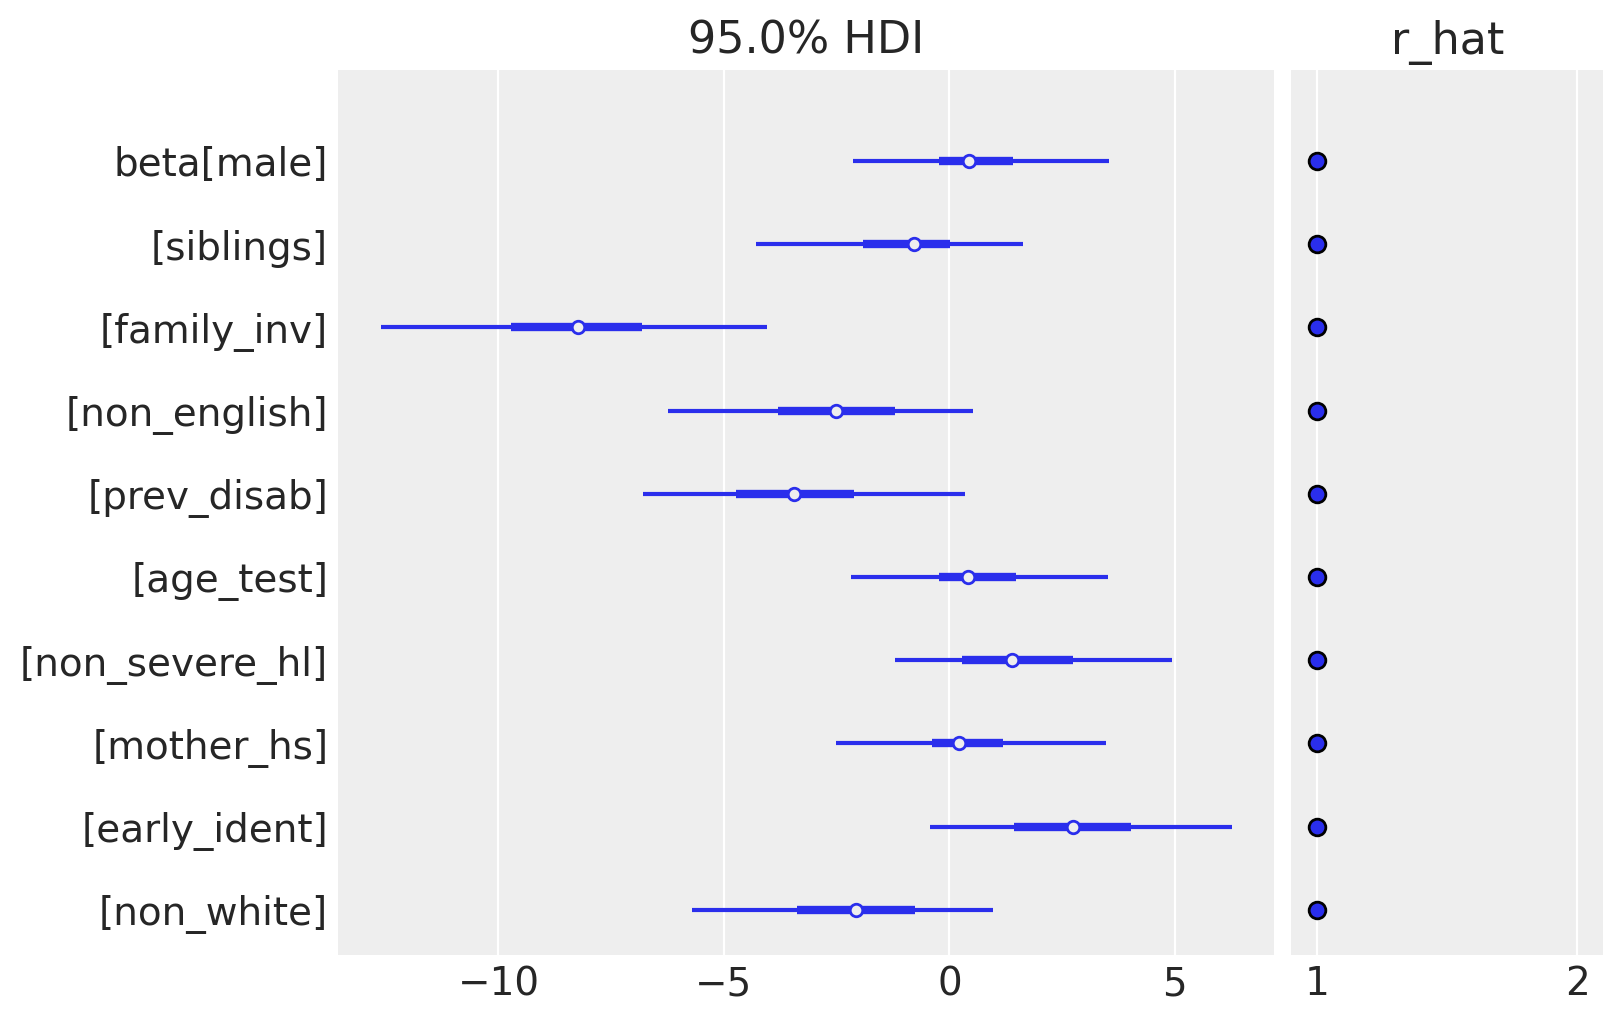

In [25]:
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True)

In [26]:
import os
print(os.cpu_count())

8
